In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Day 26 Lecture 1 Assignment

In this assignment, we will learn about linear regression models and how to plot them using the sklearn library

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

We will load the dataset below that describes the antioxidant quality of lager.

The variables are as follows:
    
The dataset contains 7 variables :

- tpc - Total phenolic content
- ma - melanoidin content
- dsa - DPPH radical scavenging activity
- asa - ABTS radical cation scavenging activity
- orac - Oxygen radical absorbance activity
- rp - Reducing Power
- mca - Metal Chelaing Activity

In [3]:
lager = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lager_antioxidant_reg.csv"
)

<IPython.core.display.Javascript object>

In [4]:
lager.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


<IPython.core.display.Javascript object>

We would like to predict the level of total phenolic content using the remaining 6 variables.

Start by removing the beer column since this column is the id for the observations.

In [5]:
lager = lager.drop(columns="beer")

<IPython.core.display.Javascript object>

Next check the data to make sure there is no missing data. Remove rows containing missing data if it exists.

In [6]:
lager.isna().sum()

tpc     0
ma      0
dsa     0
asa     0
orac    0
rp      0
mca     0
dtype: int64

<IPython.core.display.Javascript object>

Plot the scatter matrix for all variables in the dataset. Do all variables have a pairwise linear relationship?

In [7]:
# # Using seaborn
# sns.pairplot(lager)
# plt.show()

<IPython.core.display.Javascript object>

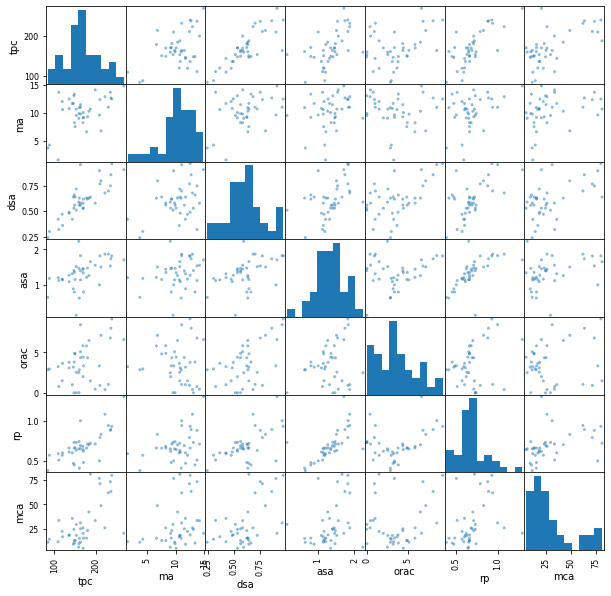

<IPython.core.display.Javascript object>

In [8]:
# Using pandas
pd.plotting.scatter_matrix(lager, figsize=(10, 10))
plt.show()

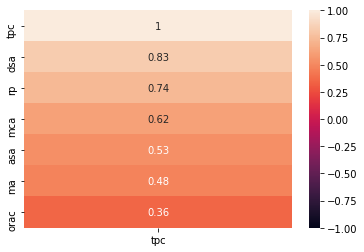

<IPython.core.display.Javascript object>

In [9]:
# Do all variables have a pairwise linear relationship?

# No, not all pairwise scatter plots show linear pictures.
# For example, all of `ma` row looks very noisy rather than linear.

# Our goal is to predict `tpc`.
# `dsa` looks to be a strong predictor (stong positive corr)
# The other predictors all seem to have some positive corr with target.
# `orac` and `ma` seem the least related

# Let's look at the corrs to further investigate.
tpc_corrs = lager.corr()[["tpc"]].sort_values("tpc", ascending=False)
sns.heatmap(tpc_corrs, vmin=-1, vmax=1, annot=True)
plt.show()

We would like to split the data into train and test samples. Use `tpc` as the y column and split the data with 25% of the data in the test sample.

In [10]:
X = lager.drop(columns="tpc")
y = lager["tpc"]

<IPython.core.display.Javascript object>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

Using sklearn, train the model.

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<IPython.core.display.Javascript object>

In [13]:
model.score(X_train, y_train)

0.7939987621454903

<IPython.core.display.Javascript object>

In [14]:
model.score(X_test, y_test)

0.876528611834816

<IPython.core.display.Javascript object>

Print out the coefficients and intercept.

In [15]:
model.intercept_

25.223325519262602

<IPython.core.display.Javascript object>

In [16]:
coef_df = pd.DataFrame({"feat": X.columns, "coef": model.coef_})
coef_df

,feat,coef
0,ma,1.463745
1,dsa,110.741107
2,asa,0.587608
3,orac,-1.255279
4,rp,78.429226
5,mca,0.395428


<IPython.core.display.Javascript object>

In [17]:
# Formula
# ------------------------------------------------
# tpc = 25.2 + 1.5*ma + 110.7*dsa + 0.6*asa + -1.3*orac + rp*78.4 + 0.4*mca


# Interpretations
# ------------------------------------------------
# Intercept:
#  *  if all variables were 0, we'd predict 25.2 as the tpc

# Coefficiets:
#  * Holding everything else constant, for every 1 unit increase in dsa, we expect to see a 110.7 increase in tpc
#  * Holding everything else constant, for every 1 unit increase in rp, we expect to see a 78.4 increase in tpc
#  * Holding everything else constant, for every 1 unit increase in orac, we expect to see a 1.3 decrease in tpc

<IPython.core.display.Javascript object>

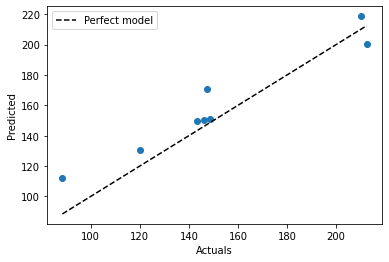

<IPython.core.display.Javascript object>

In [18]:
# Its always good to look not only at model scores, but how is you model making mistakes
y_pred = model.predict(X_test)

mn = y_test.min()
mx = y_test.max()

plt.scatter(y_test, y_pred)
plt.plot([mn, mx], [mn, mx], "--", label="Perfect model", c="black")
plt.xlabel("Actuals")
plt.ylabel("Predicted")
plt.legend()
plt.show()

In [19]:
# We tend to overpredict (the points are generally above the line)

<IPython.core.display.Javascript object>